In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import pims

import trackpy as tp
mpl.rc('figure',  figsize=(8, 8))
#mpl.rc('image', cmap='gray')
from IPython import display

# Video analysis for supplementary Information
C = 0: green channel, HK. Generally less populated than
C = 1: red channel, Ald.

We are going to look at all videos and try to match particles and their trajectories.

The null hypothesis is that the trajectories are not correlated. What is the probability of observing the given data, if this is true?

In [199]:
frames_0 = pims.TiffStack("../stackdata/no glucose 2 - C=0.tif")
frames_1 = pims.TiffStack("../stackdata/no glucose 2 - C=1.tif")

#frames_0 = pims.TiffStack("../stackdata/l-glu - C=0.tif")
#frames_1 = pims.TiffStack("../stackdata/l-glu - C=1.tif")

In [200]:
minmass = 60 # 60 for most, 150 for 20x objective
minsize = 5
separation = 20

In [201]:
f_0 = tp.locate(frames_0[0], minsize, minmass = minmass, separation = separation)

f_1 = tp.locate(frames_1[0], minsize, minmass = minmass, separation=separation)

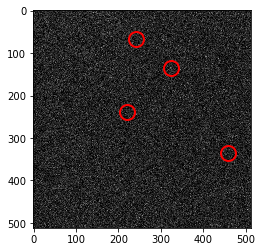

In [202]:
plt.figure()
%matplotlib inline
tp.annotate(f_0, frames_0[0]);

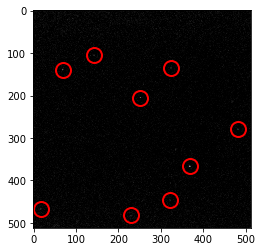

In [203]:
plt.figure()
%matplotlib inline
tp.annotate(f_1, frames_1[0])

In [204]:
f_0 = tp.batch(frames_0, minsize, minmass=minmass, separation=separation)
f_1 = tp.batch(frames_1, minsize, minmass=minmass, separation=separation)

Frame 12: 0 features


In [205]:
skiphop = 10
mem = 5
t_0 = tp.link_df(f_0, skiphop, memory = mem)
t_1 = tp.link_df(f_1, skiphop, memory = mem)

Frame 11: 2 trajectories present


In [206]:
stubsize = 10
tl_0 = tp.filter_stubs(t_0, stubsize)
tl_1 = tp.filter_stubs(t_1, stubsize)

## Removing drift

In [207]:
d = tp.compute_drift(tl_0)

KeyError: u'frame'

In [208]:
# now we remove drift from both frames
#tp.subtract_drift(tl_1, drift=d, inplace=True)
#tp.subtract_drift(tl_0, drift=d, inplace=True)

In [209]:
traj_parts = [i for i in set(tl_0.particle) if len(tl_0[tl_0.particle ==i]) > 10]
len(traj_parts)

0

IndexError: single positional indexer is out-of-bounds

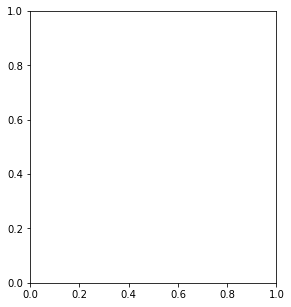

In [194]:
%matplotlib inline
nplots = len(traj_parts)

nrows = int(nplots/3) +1
ncols = 3
buff = 10 # 10 for all but 2 for 2x
plt.figure(figsize=(15,5))
for j, part in enumerate(traj_parts):
    ax = plt.subplot(nrows, ncols, j+1)
    x_traj = tl_0[tl_0.particle == part].x
    y_traj = tl_0[tl_0.particle == part].y
    xlims = [np.min(x_traj)-buff, np.max(x_traj)+buff]
    ylims = [np.min(y_traj)-buff, np.max(y_traj)+buff]
    framelims = [tl_0[tl_0.particle ==part].iloc[1].frame,
                 tl_0[tl_0.particle ==part].iloc[-1].frame]
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    ax.plot(x_traj, y_traj)
    # candidates
    cands = tl_1[(tl_1.frame >= framelims[0]) &
               (tl_1.frame <= framelims[1]) &
               (tl_1.x >= xlims[0]) &
               (tl_1.x <= xlims[1]) &
               (tl_1.y >= ylims[0]) &
               (tl_1.y <= ylims[1])]
    
    for candidate_particle in set(cands.particle):
        cand = cands[cands.particle == candidate_particle]
        ax.plot(cand.x, cand.y, color='red')
        
plt.savefig("../img/ng1.png")

NameError: name 'fig' is not defined

In [ ]:
%matplotlib inline
for no in traj_parts:
    buff = 10
    fig, ax = plt.subplots()
    x_traj =tl[tl.particle == no].x
    y_traj=tl[tl.particle == no].y
    xmin = min(x_traj) - buff
    xmax = max(x_traj) + buff
    ymin = min(y_traj) - buff
    ymax = max(y_traj) + buff

    for (i,_) in x_traj.iteritems():
        plt.cla()
        ax.imshow(frames[i])
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
        ax.plot(x_traj,y_traj, color='red')
        display.display(plt.gcf())
        display.clear_output(wait=True)

    display.clear_output(wait=True)

In [ ]:
tl.head()

In [ ]:
d0 = tp.compute_drift(tl_0)
d1 = tp.compute_drift(tl_1)

In [ ]:
d0.plot();

In [ ]:
d1.plot()